# EDA of Solar Radiation Data for three countries.

In [1]:
import pandas as pd 
import numpy as np 


## Import data as dataframes

In [2]:
df1 = pd.read_csv('../data/benin-malanville.csv')
df2 = pd.read_csv('../data/sierraleone-bumbuna.csv')
df3 = pd.read_csv('../data/togo-dapaong_qc.csv')

region1 = 'Benin Melanville'
region2 = 'Sierraleone Bumbuna'
region3 = 'Togo Dapaong QC'


dfs = {
    region1: df1,
    region2: df2,
    region3: df3
}

## Summary Statistics

In [6]:
def summary_statistics():
    for key, value in dfs.items():
        print('*********** ', 'Summary statistics for ',key, '*************', '\n')
        print(value.describe())

summary_statistics()

***********  Summary statistics for  Benin Melanville *************
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.00000

#### Data Quality

In [46]:
# Missing values
missing_values = df.isnull().sum()
print(missing_values)

# Negative values
cols = ['GHI','DNI','DHI']

for col in cols:
    print(f"col {col} has {len(df[df[col]<0])} negative values\n which is {round(len(df[df[col]<0])/len(df)*100,2)}% of the data")


# Outliers
cols = ['ModA','ModB','WS','WSgust']

for col in cols:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    # Interquartile range
    IQR = Q3 - Q1
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = len(df[(df[col] < lower_bound) | (df[col] > upper_bound)])
    print(f"col {col} has {outliers} outliers\n which is {round(outliers/len(df)*100,2)}% of the data")


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
col GHI has 258847 negative values
 which is 49.25% of the data
col DNI has 275987 negative values
 which is 52.51% of the data
col DHI has 259182 negative values
 which is 49.31% of the data
col ModA has 98 outliers
 which is 0.02% of the data
col ModB has 240 outliers
 which is 0.05% of the data
col WS has 6717 outliers
 which is 1.28% of the data
col WSgust has 5368 outliers
 which is 1.02% of the data


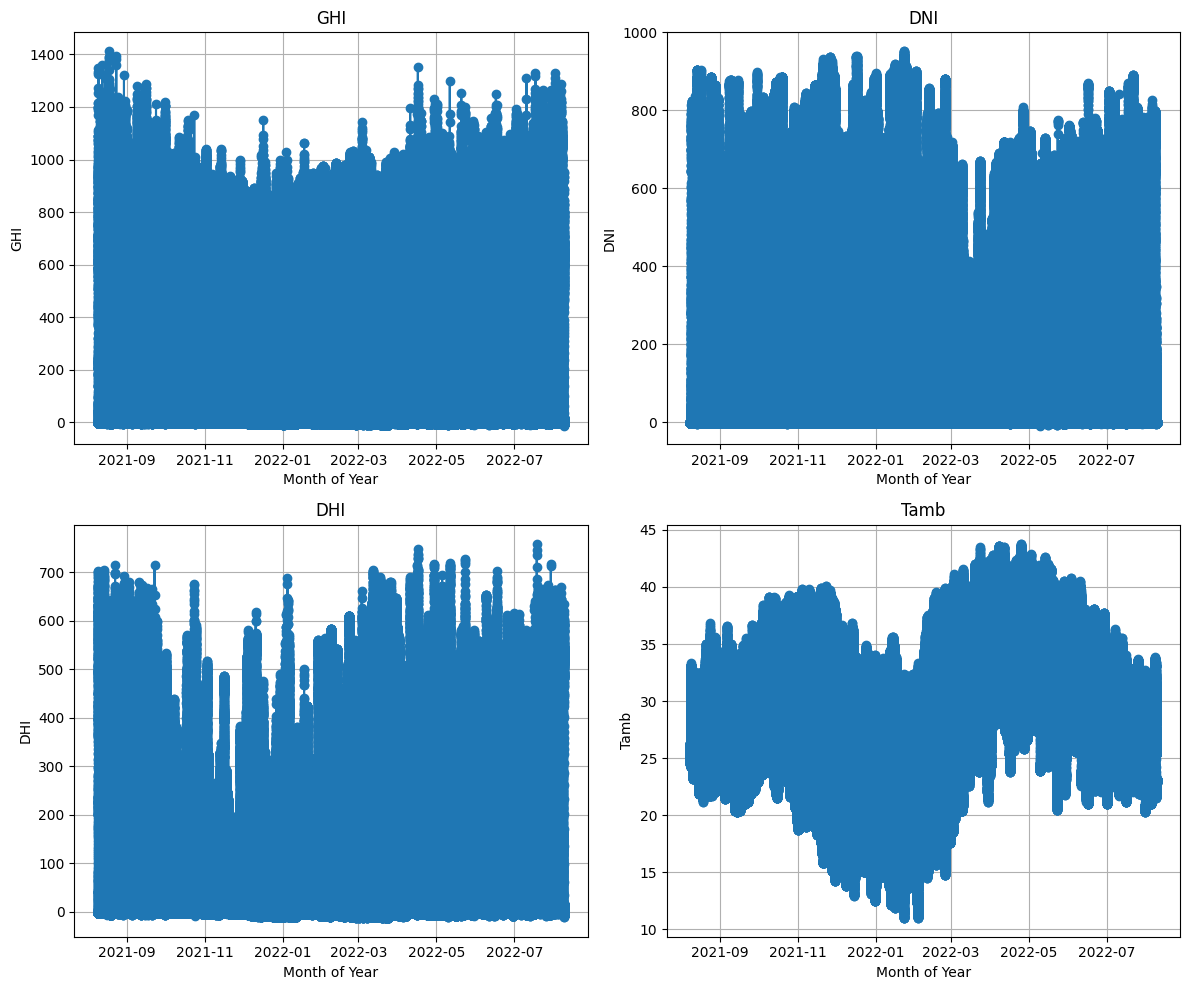

In [47]:
import matplotlib.pyplot as plt

# Accessbile time from Timestamp
df['Timestamp_Adjusted'] = pd.to_datetime(df['Timestamp'])

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

cols = ['GHI','DNI','DHI','Tamb']

for i, col in enumerate(cols):
    # Plotting on each subplot
    if(i < 2):                  
         axs[0, i].plot(df['Timestamp_Adjusted'], df[col], marker='o', linestyle='-')
         axs[0, i].set_title("{}".format(col))
         axs[0, i].set_xlabel('Month of Year')
         axs[0, i].set_ylabel(col)
         axs[0, i].grid(True)
    else:
        axs[1, i-2].plot(df['Timestamp_Adjusted'], df[col], marker='o', linestyle='-')
        axs[1, i-2].set_title("{}".format(col))
        axs[1, i-2].set_xlabel('Month of Year')
        axs[1, i-2].set_ylabel(col)
        axs[1, i-2].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


#### Effect of 'Cleaning' on ModA, ModB

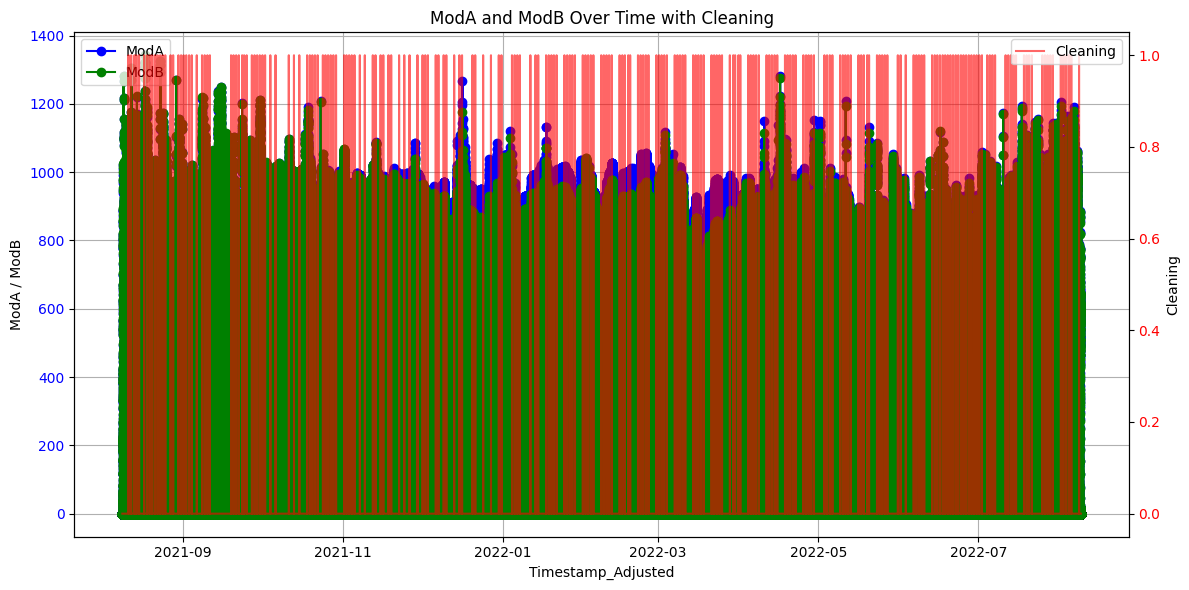

In [48]:
# Create a figure and a single subplot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot 'ModA' and 'ModB' on the primary y-axis
ax1.plot(df['Timestamp_Adjusted'], df['ModA'], marker='o', linestyle='-', color='b', label='ModA')
ax1.plot(df['Timestamp_Adjusted'], df['ModB'], marker='o', linestyle='-', color='g', label='ModB')
ax1.set_xlabel('Timestamp_Adjusted')
ax1.set_ylabel('ModA / ModB')
ax1.tick_params(axis='y', labelcolor='b')
ax1.legend(loc='upper left')

# Create a secondary y-axis for 'Cleaning'
ax2 = ax1.twinx()
ax2.plot(df['Timestamp_Adjusted'], df['Cleaning'], color='r', alpha=0.6, label='Cleaning')
ax2.set_ylabel('Cleaning')
ax2.tick_params(axis='y', labelcolor='r')
ax2.legend(loc='upper right')

# Title and grid
plt.title('ModA and ModB Over Time with Cleaning')
ax1.grid(True)

# Show plot
plt.tight_layout()
plt.show()

#### Correlation Analysis

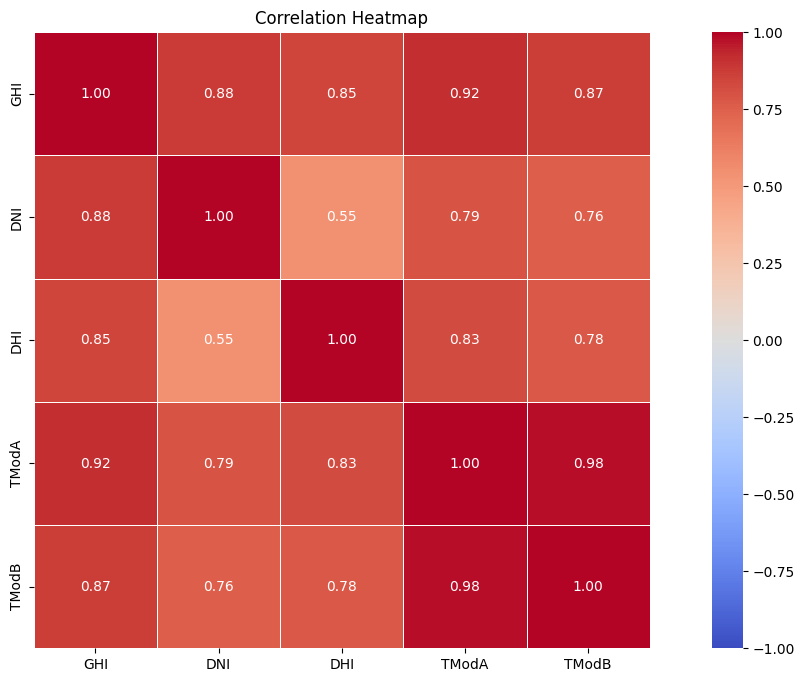

<Figure size 1600x800 with 0 Axes>

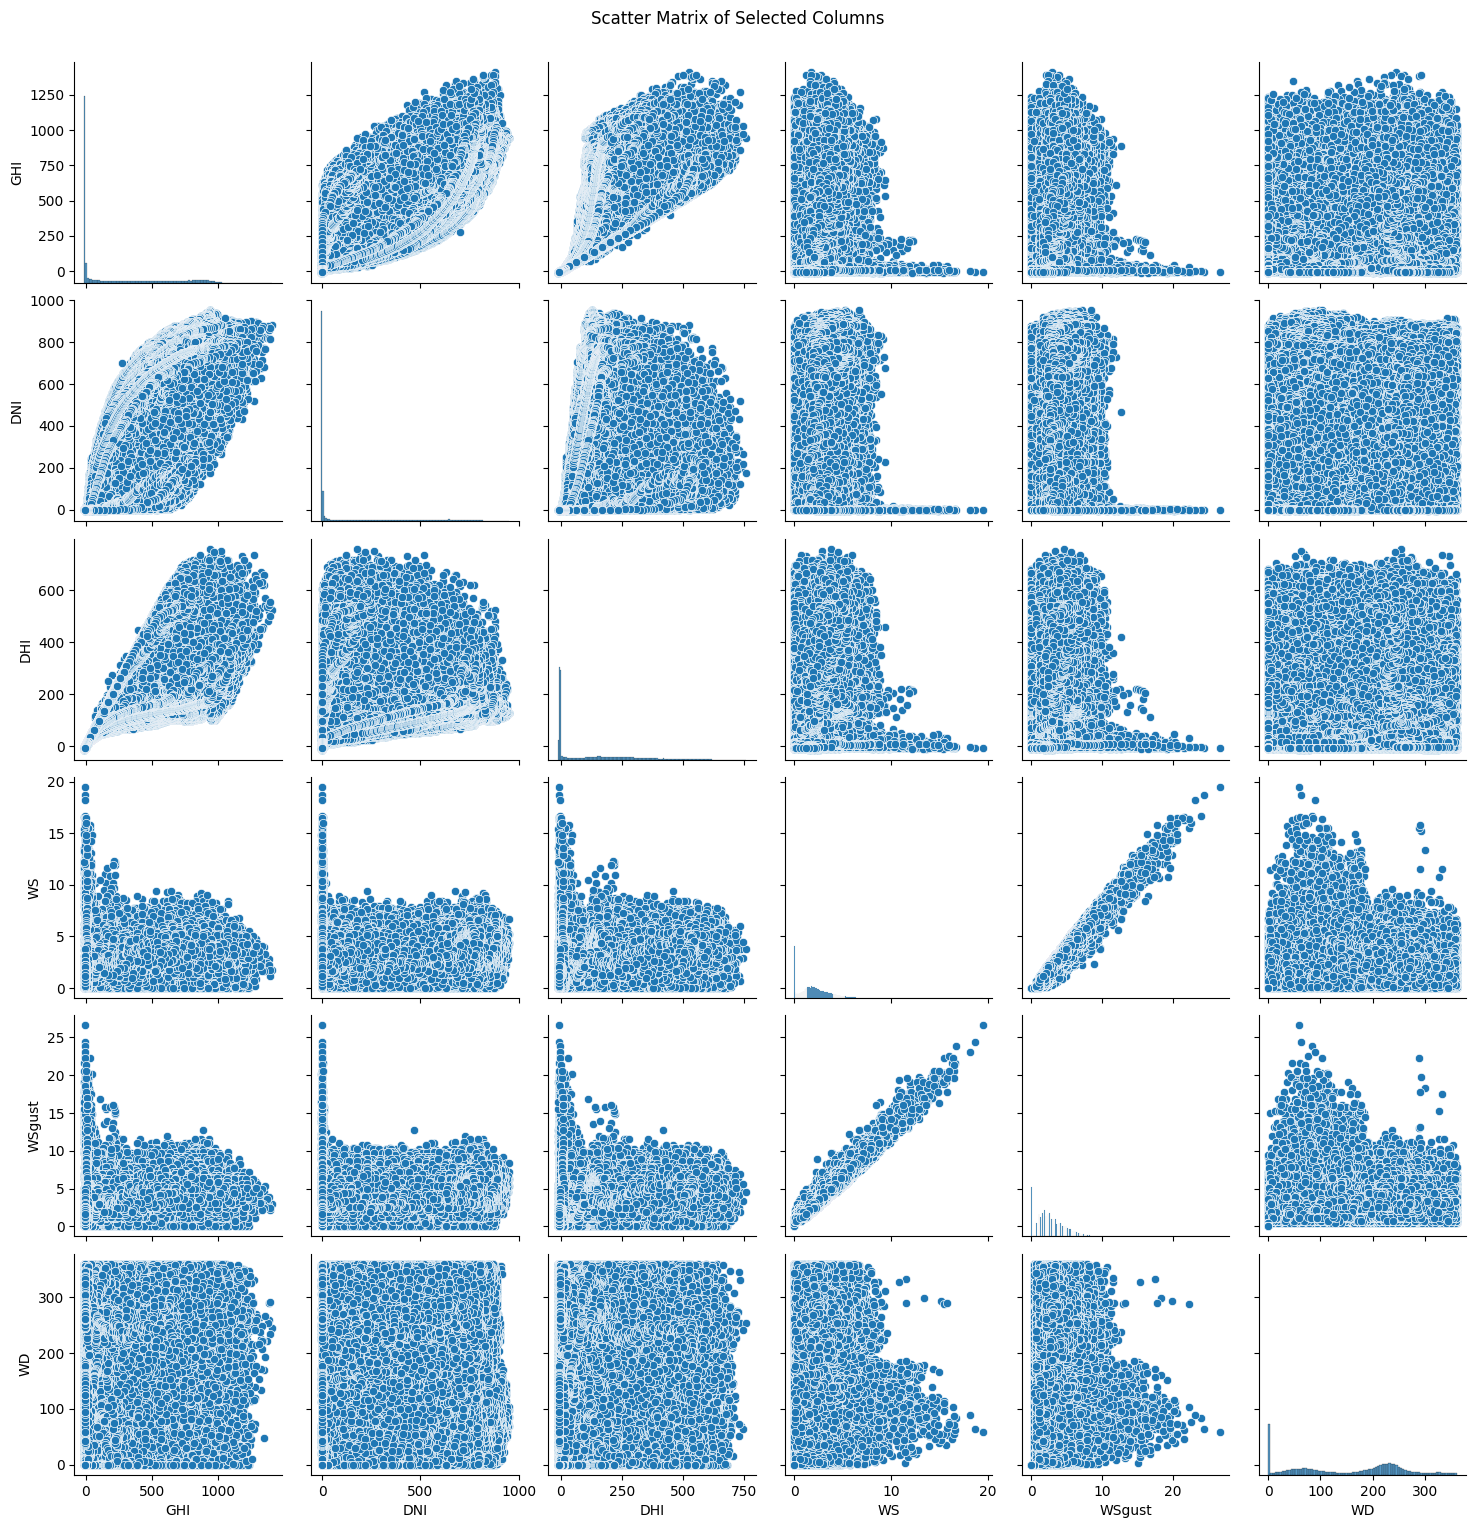

In [49]:
import seaborn as sns

# Create a 1x2 grid of subplots
fig2 = plt.figure(figsize=(16, 8))

# Correlation heatmap
corr_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
df_selected = df[corr_columns]
correlation_matrix = df_selected.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0, square=True, linewidths=0.5)
plt.title('Correlation Heatmap')

# Scatter matrix (pair plot)
corr_columns = ['GHI', 'DNI', 'DHI', 'WS', 'WSgust', 'WD']
df_selected = df[corr_columns]

# Pair plot needs its own figure, so create a new figure
fig2 = plt.figure(figsize=(16, 8))
sns.pairplot(df_selected)
plt.suptitle('Scatter Matrix of Selected Columns', y=1.02)

# Show both plots
plt.show()


#### Wind Analysis | 'WD' and 'WS'

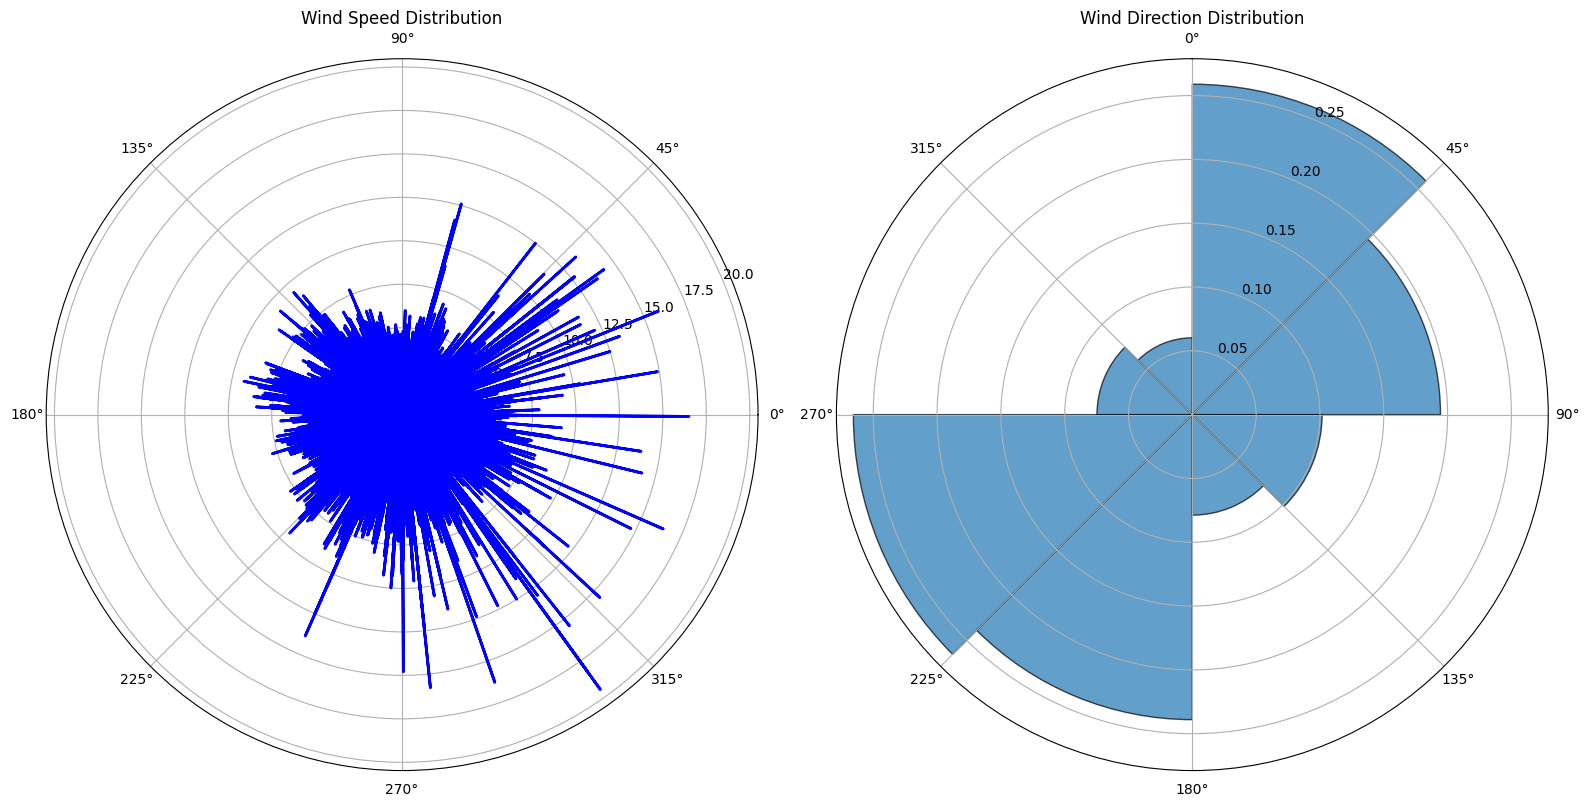

In [50]:
# Normalize wind direction for plotting
df['WD_rad'] = np.deg2rad(df['WD'])

# Create figure with two subplots
fig, axs = plt.subplots(1, 2, subplot_kw=dict(projection='polar'), figsize=(16, 8))

# Wind Speed Distribution (Radial Plot)
angles = np.linspace(0, 2 * np.pi, len(df['WS']), endpoint=False).tolist()
ws = df['WS'].tolist()

# Close the circle by appending the start value to the end
angles += angles[:1]
ws += ws[:1]

axs[0].fill(angles, ws, color='blue', alpha=0.25)
axs[0].plot(angles, ws, color='blue', linewidth=2)
axs[0].set_title('Wind Speed Distribution')

# Wind Direction Distribution (Polar Histogram)
n, bins, patches = axs[1].hist(df['WD_rad'], bins=8, edgecolor='black', alpha=0.7, density=True)
axs[1].set_title('Wind Direction Distribution')
axs[1].set_theta_zero_location('N')
axs[1].set_theta_direction(-1)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


#### Temperature Analysis

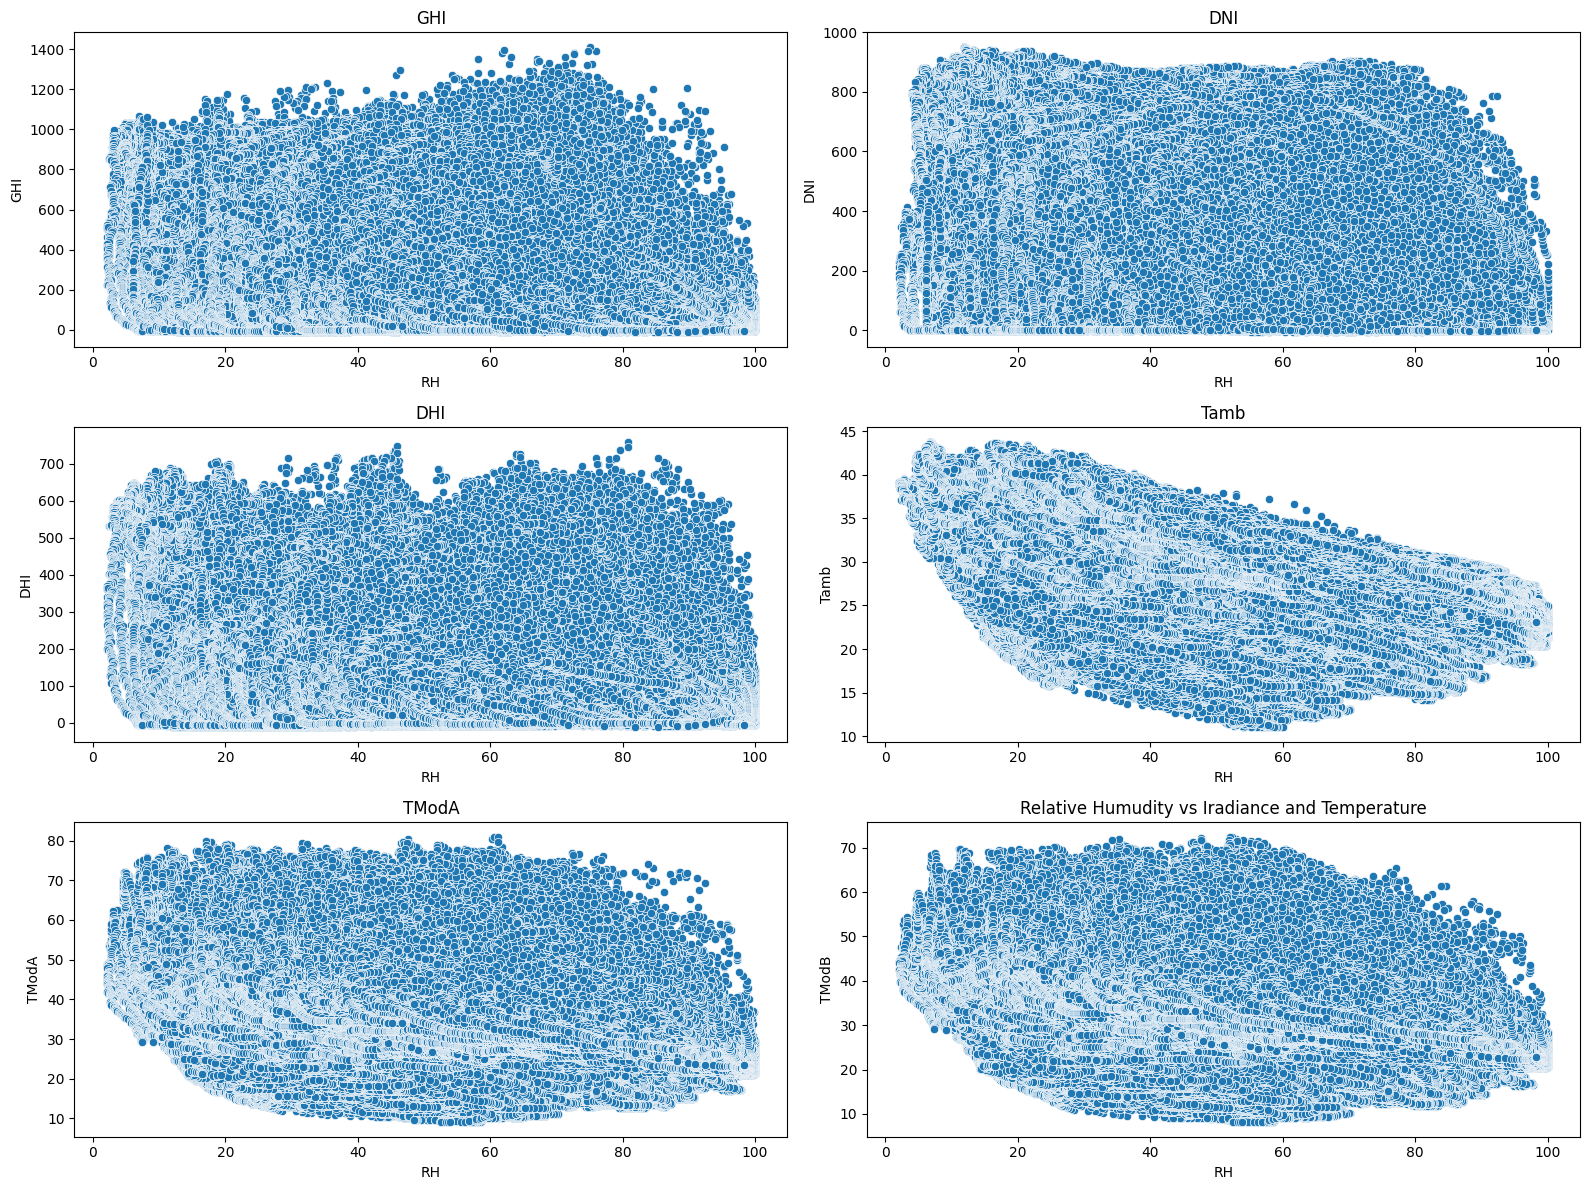

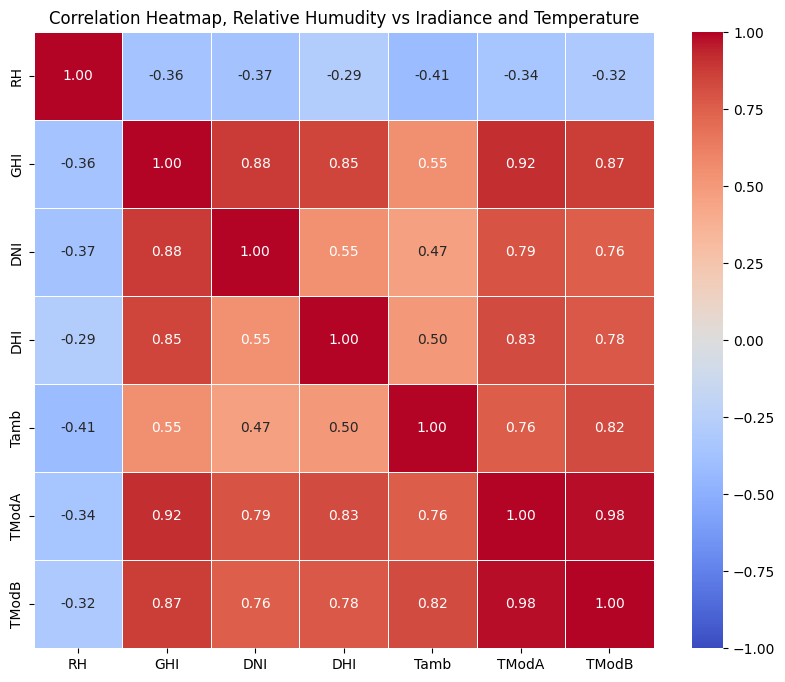

In [51]:
# Scatter plot
cols = ['GHI', 'DNI', 'DHI', 'Tamb','TModA','TModB']

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(3, 2, figsize=(16, 12))

for i, col in enumerate(cols):
    # Scatter plot for each column
    sns.scatterplot(data=df, x='RH', y=col, ax=axs[i // 2, i % 2])
    axs[i // 2, i % 2].set_title(col)
    plt.title("Relative Humudity vs Iradiance and Temperature")

plt.tight_layout()
plt.show()

# Heatmap

# Compute the correlation matrix
cols = ['RH','GHI', 'DNI', 'DHI', 'Tamb','TModA','TModB']
df_selected = df[cols]
correlation_matrix = df_selected.corr()


# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0, linewidths=0.5)
plt.title('Correlation Heatmap, Relative Humudity vs Iradiance and Temperature')
plt.show()


#### Histograms | Iradiance, temperature, wind

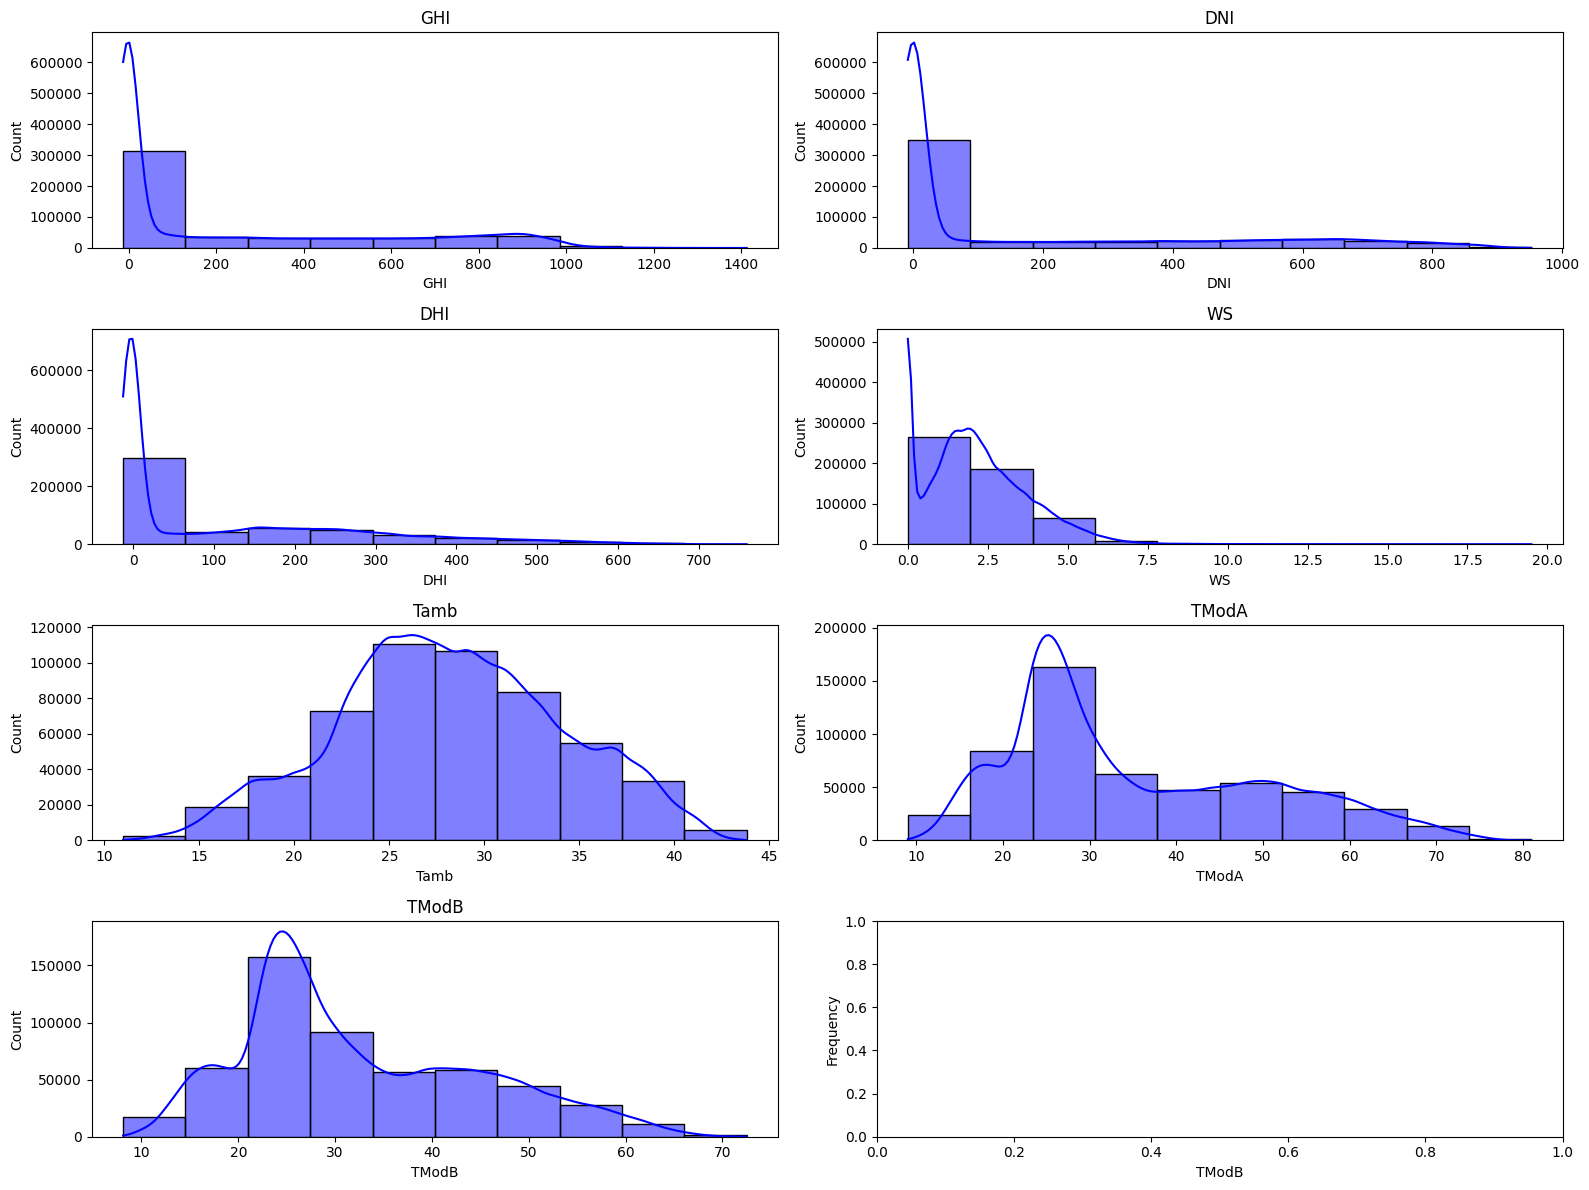

In [52]:
# Scatter plot
cols = ['GHI', 'DNI', 'DHI', 'WS','Tamb','TModA','TModB']

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(4, 2, figsize=(16, 12))

for i, col in enumerate(cols):
    sns.histplot(df[col], bins=10, kde=True, color='blue', edgecolor='black',ax=axs[i // 2, i % 2])
    # Add titles and labels
    axs[i // 2, i % 2].set_title(col)    
    plt.xlabel(col)
    plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

In [53]:
df.head(2)

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  ...  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4  ...   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0  ...   

      WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  Comments  \
0  122.1      0.0  998         0            0.0   26.3   26.2       NaN   
1    0.0      0.0  998         0            0.0   26.3   26.2       NaN   

   Timestamp_Adjusted    WD_rad  
0 2021-08-09 00:01:00  2.131047  
1 2021-08-09 00:02:00  0.000000  

[2 rows x 21 columns]

#### Z-scores Analysis

In [54]:
# Define a threshold for outliers
threshold = 2

# Specify columns to exclude
exclude_columns = ['Timestamp', 'Timestamp_Adjusted', 'Comments']

def identify_outliers(df, threshold, exclude_columns):
    
    
    for column in df.columns:
        if column in exclude_columns:
            continue  # Skip excluded columns

        # Calculate mean and standard deviation
        mean = df[column].mean()
        std_dev = df[column].std()
        
        # Calculate Z-scores
        z_scores = (df[column] - mean) / std_dev
        
        # Flag outliers
        df[f'{column}_Z-score'] = z_scores
        df[f'{column}_Outlier'] = np.abs(z_scores) > threshold
    
    # Aggregate outlier information into a single column
    def flag_outlier_columns(row):
        outlier_cols = [col for col in df.columns if col.endswith('_Outlier') and row[col]]
        if outlier_cols:
            return ', '.join([col.replace('_Outlier', '') for col in outlier_cols])
        else:
            return 'none'
    
    df['Outliers'] = df.apply(flag_outlier_columns, axis=1)
    
    # Clean up temporary columns
    df.drop(columns=[col for col in df.columns if col.endswith('_Z-score') or col.endswith('_Outlier')], inplace=True)
    
    return df

# Apply the function to the DataFrame, excluding specified columns
df_with_outliers = identify_outliers(df, threshold, exclude_columns)

# Print the DataFrame with outliers information
print(df_with_outliers.head())

          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  ...  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4  ...   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0  ...   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1  ...   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7  ...   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7  ...   

   WDstdev   BP  Cleaning  Precipitation  TModA  TModB  Comments  \
0      0.0  998         0            0.0   26.3   26.2       NaN   
1      0.0  998         0            0.0   26.3   26.2       NaN   
2      1.5  997         0            0.0   26.4   26.2       NaN   
3      1.3  997         0            0.0   26.4   26.3       NaN   
4      1.0  997         0            0.0   26.4   26.3       NaN   

   Timestamp_Adjusted    WD_rad Outliers  
0 2021-08-09 00:01:00  2.131047     none  
1 2021-08-09 00:02:00  0

In [55]:
df_with_outliers['Outliers'].unique()

array(['none', 'WDstdev', 'WSstdev', ...,
       'GHI, DNI, DHI, ModA, ModB, WSstdev, TModA, TModB',
       'WS, WSgust, WD, WD_rad', 'GHI, DNI, DHI, ModA, ModB, WS, WSgust'],
      dtype=object)

#### Bubble Charts | GHI , Tamb, WS


Data types and sample values:


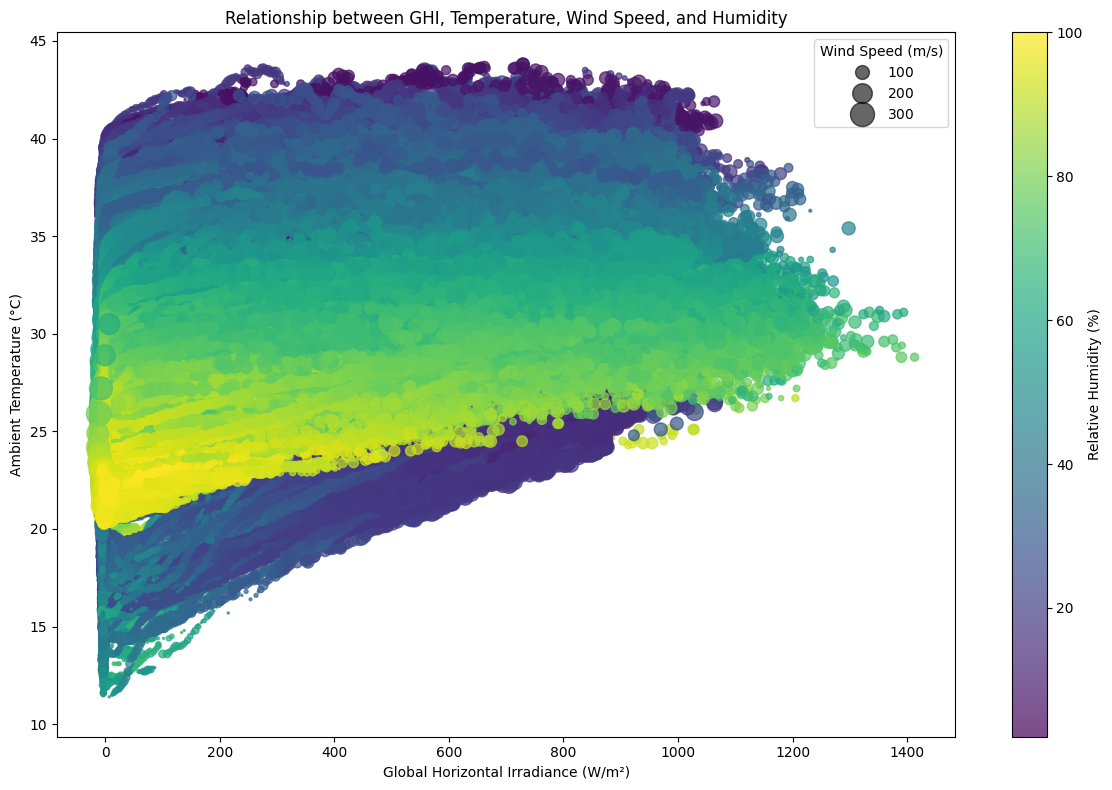


Number of points plotted: 525600


In [56]:
# Diagnostic step 3: Check the data types and some sample values

df = df_with_outliers

# Attempt to create the bubble chart
try:
    fig, ax = plt.subplots(figsize=(12, 8))

    scatter = ax.scatter(df['GHI'], df['Tamb'], s=df['WS']*20, c=df['RH'], cmap='viridis', alpha=0.7)

    ax.set_xlabel('Global Horizontal Irradiance (W/m²)')
    ax.set_ylabel('Ambient Temperature (°C)')
    ax.set_title('Relationship between GHI, Temperature, Wind Speed, and Humidity')

    cbar = plt.colorbar(scatter)
    cbar.set_label('Relative Humidity (%)')

    handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6, num=4)
    size_legend = ax.legend(handles, labels, loc="upper right", title="Wind Speed (m/s)")

    plt.tight_layout()
    plt.show()

    print(f"\nNumber of points plotted: {len(scatter.get_offsets())}")
except Exception as e:
    print(f"Error in creating plot: {str(e)}")



#### Cleaning

In [58]:
df=df.drop(columns=['Comments'])
df.head()

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  ...  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4  ...   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0  ...   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1  ...   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7  ...   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7  ...   

      WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0  122.1      0.0  998         0            0.0   26.3   26.2   
1    0.0      0.0  998         0            0.0   26.3   26.2   
2  124.6      1.5  997         0            0.0   26.4   26.2   
3  120.3      1.3  997         0            0.0   26.4   26.3   
4  113.2      1.0  997         0            0.0   26.4   26.3   

   Timestamp_Adjusted    WD_rad  Outliers  
0 2021-08-09 00:01:00  2.131047      none  
1 2021-08-09 00:02:00  0.000000      none  
2 2021-08-09 00:03:00  2.174680      none  
3 2021-08-09 00:04:00  2.099631      none  
4 2021-08-09 00:05:00  1.975713      none  

[5 rows x 21 columns]